# Live \#30 de Mario Filho : Métricas de Regressão
link: https://bit.ly/mario-live30

In [ ]:
import pandas as pd
import numpy as np

# 80/20 - regra de pareto - vamos

Vamos ver as métricas que vão resolver a maioria dos problemas.

**Métricas** são uma bússola para chegar a um objetivo.

É sempre bom usar mais de uma métrica, cada métrica é uma forma de avaliar o modelo de maneiras diferentes.

In [ ]:
# Vamos gerar Ŷ = p e Y onde
#   p = Ŷ são as previsões de um modelo
#   Y são os valores reais

# seed para ter o mesmo comportamento para qualquer execução
np.random.seed(50)

p = np.random.uniform(size=10)

y = np.random.uniform(size=10)

# Um y que tem um Outlier
y_outlier = y.copy()
y_outlier[0] = 100


# (R)MSE - (Root) Mean Squared Error - (Raiz Quadrada) do Erro Médio Quadrado

- A base é o MSE, mas como ele costuma ser um valor muito grande e por isso interpretável, fazemos uma raiz quadrada dele (RMSE) para voltar a ter a dimensão dos erros unitários (erro de uma previsão).
- O MSE eleva o quadrado por duas razões:
  1. Erro acima do valor real ou abaixo vão ficar positivos (pois eleva ao quadrado.
  2. Os módulos dos erros maiores vão gerar maior penalidade, assim tende a ser mais impactado por outliers.


- minimizador = média - se eu usar p = média o erro é menor que p = mediana

In [ ]:
# Usando MSE / RMSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, p)
mse_outlier = mean_squared_error(y_outlier, p)
print("Sem outlier = {} | Com outlier = {}".format(np.sqrt(mse), np.sqrt(mse_outlier)))

Sem outlier = 0.29856932110182516 | Com outlier = 31.467751454752868


**Conclusão**
+ Por ter um único outlier que foi mal previsto houve um grande impcato no MSE/RMSE

**Observaçâo**
+ Se você usar o MSE **SE ATENTE COM OUTLIERS**. Pode ser que seu modelo seja bom, mas por ter outilers isso está impcatando muito na métrica e assim você pode pensar que seu modelo esteja ruim

# (R)MSLE - (Root) Mean Squared Logarithmic Error - Raiz Quadrada do Erro Médio Logarítmico Quadrado

+ Ele acaba sendo uma aproximação para um **Erro percentual**
+ Matemáticamente ele é mais fácil de minimisar
+ não pode ser negativo
+ O MSE se importa com a diferença "absoluta", enquanto que o MSLE se importa com a diferença "relativa" por calcular o erro como uma *diferença percentual* entre o valor real (y) e o previsto (ŷ)

Exemplo:
https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/mean-squared-logarithmic-error-(msle)

Costuma ser usado em vendas, exemplo: se eseprar vender 1000 e vende 1001 o impcato é menor pois só o fato de conseguir prever 1000 já é um grande ganho. Se usa-semos MSE o impcato entre y = 2 ŷ = 3 e seria o mesmo que y = 1000 e ŷ = 10001, que para uma venda, nâo é impcatante assim.

**Comparando a questão de OutLiers entre MSE e MSLE**
+ O MSLE é sensível a outliers, bem menos que MSE

In [ ]:
from sklearn.metrics import mean_squared_log_error

# Se eu tiver: y = 10 e ŷ = 11 teremos
#   A diferença absoluta entre os erros é 1
#   Mas por usarmos MSLE, a diferença  dos erros muda, pois mesmo o erro sendo "1" em absoluto
#     você pecebe que errar 1 entre 10 e 11 é mais impcatante do que errar entre 110 e 111
#     Tipo: se você esperar ganhar um carro e ganha 2 VOCÊ TEM EM DOBRO, É DE 100% O GANHO
#           se você espera ganhar R$1.000,00 e ganha R$1.001,00 , esse 1R$ a mais acaba sendo insignificante

# A ideia do MSLE é fazer y/ŷ; só que, como é chato fazer divisão convertermos para log pois
# log(a/b) = log a - lob b
# E também colocamos (+1) nas duas parcelas para não ter o valor 0 assim a formula fica
# MSLE(Ŷ,Y) = 1/N * sum(log(ŷ + 1) - log(y + 1))
print(np.log(10) - np.log(11))
print(np.log(110) - np.log(111))

msle = mean_squared_log_error(y, p)
msle_outlier = mean_squared_log_error(y_outlier, p)

# O MSLE é sensível a outliers, bem menos que MSE
print("Sem outlier = {} | Com outlier = {}".format(np.sqrt(msle), np.sqrt(msle_outlier)))

-0.09531017980432477
-0.009049835519917337
Sem outlier = 0.1817720117174641 | Com outlier = 1.3442877101630468


([<matplotlib.lines.Line2D at 0x7f01ac137cf8>],
 [<matplotlib.lines.Line2D at 0x7f01ac137e10>])

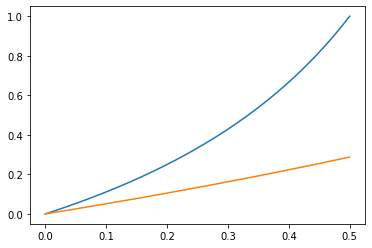

In [ ]:
from matplotlib import pyplot as plt

y_ = np.linspace(0.5, 1, 1000)
sle = np.sqrt((np.log1p(1) - np.log1p(y_))**2)
ape = np.abs((1 - y_) / y_)

# MSLE em laranja
# MSE em Azul
plt.plot(1-y_, ape), plt.plot(1-y_, sle)

# MAE - Mean Absolute Error - Erro Médio Absoluto
+ minimizador = mediana
+ menos preocupado com outliers, ele só faz o módulo dos dados
+ Por isso você usa quando não tem outilers em geral, quando sâo extremamente raros

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y, p)
mae_outlier = mean_absolute_error(y_outlier, p)
print("Sem outlier = {} | Com outlier = {}".format(mae,mae_outlier))

Sem outlier = 0.23045186806726878 | Com outlier = 10.166185659415934


# MedAE - Median Absolute Error - Erro Mediano Absoluto

- erro no percentil - percentil 50 (mediana)
- Esso erro é raro de ver sendo usado, mas o foi no site de preço de casas na Zillow 
  - https://www.zillow.com/research/putting-accuracy-in-context-3255/
  - No modelo deles agente tinha que metade dos erros do modelo deles era menor do que 8,5%

[https://en.wikipedia.org/wiki/Median_absolute_deviation](https://en.wikipedia.org/wiki/Median_absolute_deviation)
[https://www.oreilly.com/library/view/machine-learning-for/9781786469878/9f44e711-deb6-42de-abbd-524832ad32cc.xhtml](https://www.oreilly.com/library/view/machine-learning-for/9781786469878/9f44e711-deb6-42de-abbd-524832ad32cc.xhtml)

Lembrando: Mediana é o valor que fica no meio caso você ordenar tudo em forma ascendente um conjunto de dados.

Exemplo:
Consider the data (1, 1, 2, 2, 4, 6, 9). 

It has a median value of 2, cuz *(1, 1, 2, **2**, 4, 6, 9)*.

The absolute deviations about 2 are (1, 1, 0, 0, 2, 4, 7) which in turn have a median value of 1 (because the sorted absolute deviations are (0, 0, 1, 1, 2, 4, 7)). 

So the median absolute deviation for this data is 1.

In [ ]:
from sklearn.metrics import median_absolute_error

medae = median_absolute_error(y, p)
medae_outlier = median_absolute_error(y_outlier, p)

# Como agente pega a distância da mediana, um outiler impacta muito pouco nesse modelo
print("Sem outlier = {} | Com outlier = {}".format(medae, medae_outlier))

Sem outlier = 0.11999387786570043 | Com outlier = 0.11999387786570043


# MAPE - Mean Absolute Percentage Error - Erro Médio Percentual Absoluto
+ Erro mais fácil de ser explicado, fica entre [0,1]
+ É a média das porcentagens de erro
+ No exemplo abaixo temos 0.42 de MPAE, ou seja: **O modelo erra 42%** mas nâo se sabe se é acima do valor ou abaixo do valor real.
+ https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

In [ ]:
# ELe não tem por default no skilearn
def mape(y_true, y_pred):
  return np.mean( np.abs( (y_true - y_pred) / y_true ) ) 

mape_ = mape(y, p)
mape_outlier = mape(y_outlier, p)
print("Sem outlier = {} | Com outlier = {}".format(mape_, mape_outlier))

Sem outlier = 0.4259730428408323 | Com outlier = 0.48275323593084013


# R2 - R-squared - R-quadrado

+ Erro bastante popular
+ [Porque o R2 é inútil](https://data.library.virginia.edu/is-r-squared-useless/)

# Outras perguntas respondidas

+ Tratar outilers no y de regresssâo: winsorizar
+ Se precizar de GPU para coisas extermamente seriesas, pode-se pensar em alugar a AWS que tem GPU pra essas coisas.
+ É sempre usar métricas de acordo com o negócio que está resolvendo: 
  - Em geral selecione uma primaria de acordo com o problema
   - Dpeois escolheas outra para ter mais ângulos de observação

In [ ]:
# Entendendo MaeAD
y_true = np.asarray([3, -0.5, 2, 7, 6])
y_pred = np.asarray([2.5, 0.0, 2, 8, 9])

print(np.sort(np.absolute(y_true - y_pred)))
median_error_manual = np.median(np.absolute(y_true - y_pred)) # calculo manual
print("manual", median_error_manual, "| sklearn", median_absolute_error(y_true, y_pred))

[0.  0.5 0.5 1.  3. ]
manual 0.5 | sklearn 0.5
